<a href="https://colab.research.google.com/github/gaiya2/Jonathan/blob/master/module_1_mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

**Benefits of Predicting Sales Using Multiple Linear Regression**

Predicting sales using multiple linear regression can significantly benefit a business by providing data-driven insights into the factors that influence sales performance. By analyzing the relationship between sales and multiple independent variables—such as advertising spend, pricing, seasonality, and customer demographics—businesses can make more accurate forecasts, optimize resource allocation, and develop targeted marketing strategies. This helps in minimizing risks, improving decision-making, and ultimately increasing profitability and competitive advantage.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [ ]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

In [ ]:
df.shape

(572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [ ]:
df.describe()

,Radio,Social Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


In [ ]:
df['Influencer'].unique()

array(['Micro', 'Mega', 'Nano', 'Macro'], dtype=object)

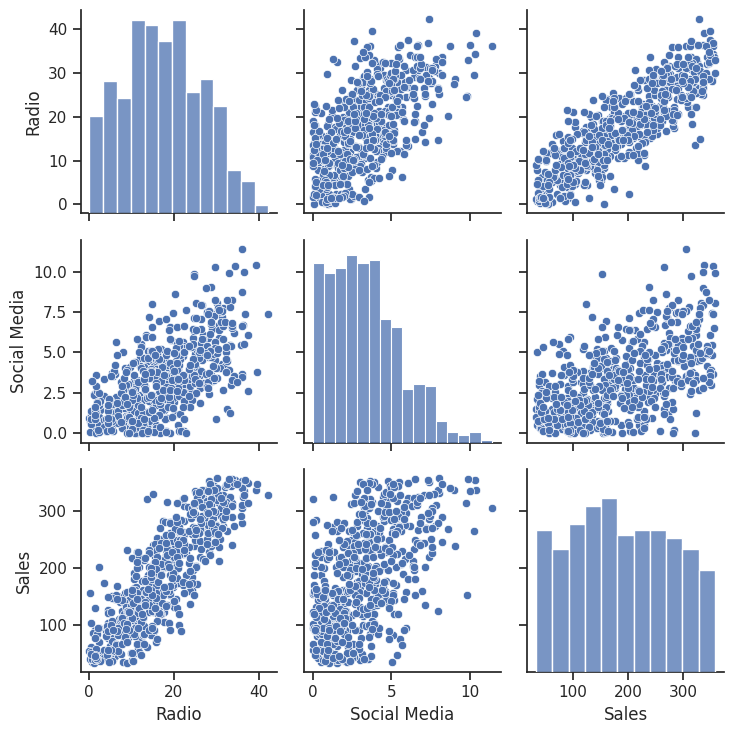

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the dataset
sns.set(style="ticks")
pairplot_fig = sns.pairplot(df)
plt.tight_layout()
plt.show()


The pairplot above visually displays pairwise relationships between all the continuous variables in the dataset— Radio, Social Media, and Sales. This helps in identifying potential linear relationships, patterns, and outliers among the features. From the plot, we can begin to notice which marketing channels might have stronger linear relationships with sales, which is crucial for building a robust regression model.


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [ ]:
# Drop rows with missing values
data_cleaned = df.dropna()
data_cleaned.shape

# Encode categorical variables (if needed)
#data_encoded = pd.get_dummies(data_cleaned, columns=['Influencer'])

# Display the first few rows of the cleaned and encoded dataset
#data_encoded.head()

(572, 5)

In [ ]:
# Check for categorical variables
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Encode categorical variables (if any)
if len(categorical_cols) > 0:
    data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)
else:
    data_encoded = data_cleaned.copy()

# Preview the cleaned dataset
print(data_encoded.head())

       Radio  Social Media       Sales  TV_Low  TV_Medium  Influencer_Mega  \
0   3.518070      2.293790   55.261284    True      False            False   
1   7.756876      2.572287   67.574904    True      False             True   
2  20.348988      1.227180  272.250108   False      False            False   
3  20.108487      2.728374  195.102176   False       True             True   
4  31.653200      7.776978  273.960377   False      False            False   

   Influencer_Micro  Influencer_Nano  
0              True            False  
1             False            False  
2              True            False  
3             False            False  
4             False             True  


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [ ]:
import statsmodels.formula.api as smf

# Rename columns to remove spaces for formula compatibility
data_encoded = data_encoded.rename(columns={'Social Media': 'Social_Media'})

# Define the formula including all predictors
formula = 'Sales ~ Radio + Social_Media + TV_Low + TV_Medium + Influencer_Mega + Influencer_Micro + Influencer_Nano'

# Fit the OLS model
model = smf.ols(formula=formula, data=data_encoded).fit()

# Display the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.82e-282
Time:                        20:52:21   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Regression Analysis Report on the Impact of Advertising Channels and Influencer Types on Sales**

The multiple linear regression analysis aimed to determine the effect of advertising channels and influencer types on sales. The model demonstrated a strong fit with an R-squared of 0.904, indicating that approximately 90.4% of the variance in sales is explained by the predictors. Among the variables, TV advertising showed a significant impact: both low and medium TV spending were associated with significant decreases in sales compared to high TV spending, with coefficients of -154.57 and -75.59 respectively. Radio also had a positive and statistically significant effect, where each unit increase in radio spend was associated with a 2.97 unit increase in sales. In contrast, social media advertising and the different influencer categories (Mega, Micro, and Nano) did not show statistically significant effects on sales. These results suggest that traditional media channels, particularly TV and radio, play a more crucial role in influencing sales within this dataset, whereas digital and influencer marketing strategies may require reevaluation or better targeting to be effective.

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

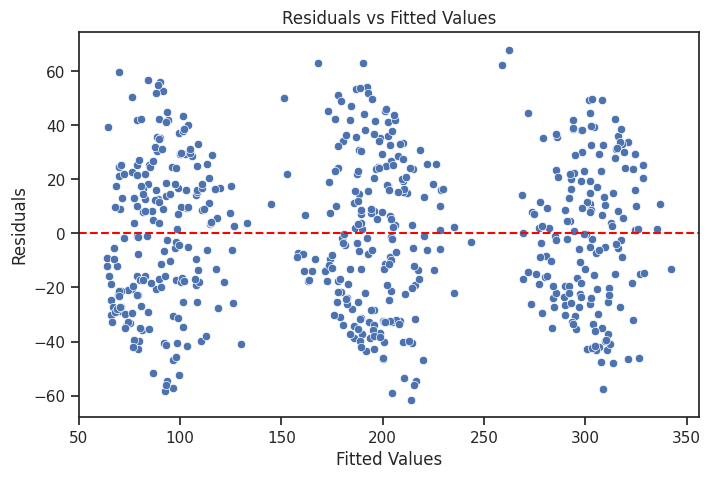

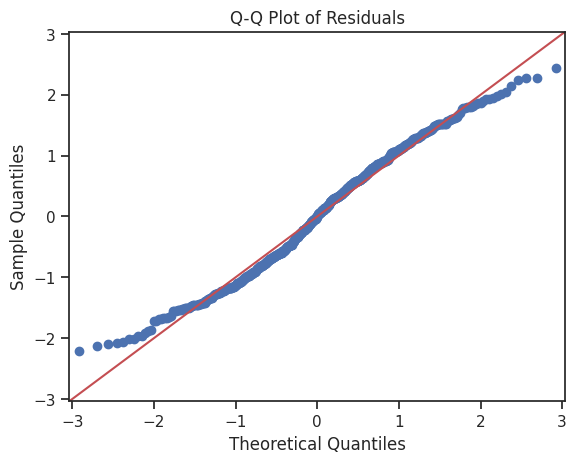

In [ ]:
import statsmodels.api as sm

# Calculate fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid

# 1. Scatterplot of Fitted Values vs Residuals (to check linearity & homoscedasticity)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Q-Q Plot of Residuals (to check normality)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [ ]:
# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.82e-282
Time:                        21:04:23   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Interpretation of Model Results**
The Ordinary Least Squares (OLS) regression model shows an R-squared value of 0.904, meaning that approximately 90.4% of the variance in Sales can be explained by the independent variables (TV, Radio, Social Media, and Influencer type). This indicates a strong fit of the model to the data.

Intercept
217.48: The expected Sales value when all predictors are zero (i.e., baseline category for TV is 'High' and for Influencer is unspecified).

TV
TV_Low: Coefficient = -154.57, p-value < 0.001 → Statistically significant. This suggests that, holding other factors constant, choosing "Low" TV exposure reduces Sales by ~154.57 units compared to "High" TV exposure.

TV_Medium: Coefficient = -75.59, p-value < 0.001 → Statistically significant. Medium TV exposure reduces Sales by ~75.59 units compared to High TV.

Influencer
Mega, Micro, and Nano influencer types: All have p-values > 0.05, indicating they are not statistically significant predictors of Sales in this model.

Radio
Coefficient = 2.97, p-value < 0.001 → Statistically significant. Every 1-unit increase in Radio advertising leads to an increase of ~2.97 in Sales, holding other variables constant.

Social Media
Coefficient = -0.14, p-value = 0.837 → Not statistically significant, meaning social media presence does not have a meaningful impact on Sales in this model.

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

** Key Considerations and Reflections on the Regression Analysis Project**

This regression analysis project provided valuable insights into how different marketing strategies impact sales. One of the key takeaways is the importance of verifying regression assumptions—such as linearity, normality, independence, and constant variance—to ensure that the model's conclusions are reliable. For example, scatterplots and Q-Q plots help validate these assumptions and confirm that the residuals behave as expected.

Interpreting model coefficients also proved critical. It became clear that TV advertising, especially at high exposure levels, is a major driver of sales, with significant negative impacts when downgraded to medium or low. Radio advertising also positively and significantly affects sales. However, Influencer type and Social Media advertising did not show statistically significant effects, suggesting that these channels may be less impactful or that their effect requires a different modeling approach.

From a business strategy perspective, the model suggests that marketing budgets should prioritize TV (particularly high exposure) and Radio, as these channels have a measurable return on sales.

**Recommendations for Stakeholders:**

- Invest more in TV advertising, especially maintaining or increasing high exposure campaigns.

- Continue leveraging Radio as it has a significant positive influence on sales.

- Reevaluate Social Media and Influencer marketing, as the current strategies may not be effective or may need to be better targeted/measured.